In [46]:
from foundational_model.models import ViTMAE
import foundational_model.data as data
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
sample_data = data.PretrainChannelWise_emg2qwerty("/home/lawrence/emg2qwerty/data/2020-08-17-1597700134-keystrokes-09456349.hdf5",
                    window_length = 5000,
                    padding = [0,0],  # 900ms past context, 100ms future context
                    stride = 5000)

In [48]:
len(sample_data)

8352

In [49]:
for i in range(32):
    sample_data[i]

In [ ]:
model = ViTMAE.ViTMAEForEMG_Pretraining(
    ViTMAE.ViTMAEForEMGConfig(
        sequence_len = sample_data[0]["emg"].shape[-1],
        n_fft = 256,
        hop_length = 16,
        log_spectogram = False
    )
)

In [51]:
sample_data[400]["emg"].shape[-1]

5000

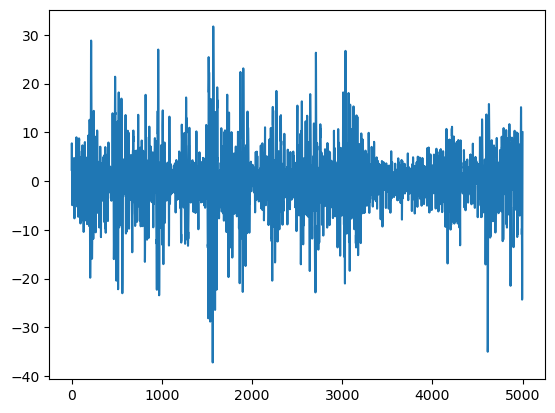

In [52]:
plt.plot(sample_data[900]["emg"][0])

torch.Size([1, 1, 5000])
taking log
torch.Size([1, 1, 320, 320])


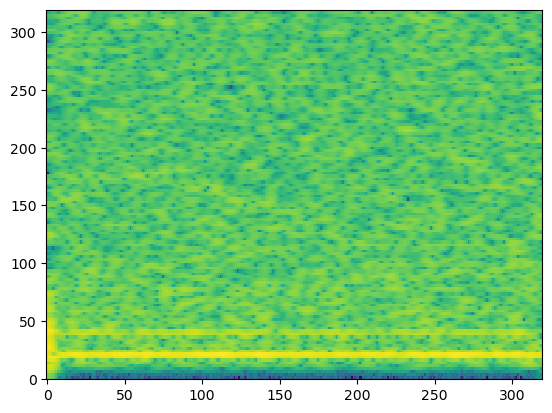

In [54]:
waveform = sample_data[0]["emg"].unsqueeze(0)
print(waveform.shape)

sample_spec,phases = model.forward_transform(waveform)
print(sample_spec.shape)

plt.imshow(sample_spec.detach().squeeze(0).squeeze(0).cpu().numpy(), aspect="auto",
           origin="lower", interpolation="none")

In [41]:
import torch
assert torch.isfinite(sample_spec).all()

reconstructed spectogram tensor([[[[-15.6173-1.3653e-06j, -15.4038-1.3466e-06j, -14.9744-1.3091e-06j,
            ...,  -0.6153-5.3794e-08j,  -0.6337-5.5400e-08j,
            -0.6433-5.6239e-08j],
          [ 16.0796-4.8642e-07j,  15.6134+3.1477e+00j,  14.2197+6.0148e+00j,
            ...,   0.5866-3.3656e-01j,   0.6719-2.2050e-01j,
             0.7194-6.4047e-02j],
          [-17.8101+6.9355e-06j, -16.1426-7.0109e+00j, -11.7022-1.2433e+01j,
            ...,  -0.4006+6.6089e-01j,  -0.6591+4.4304e-01j,
            -0.7917+1.5391e-01j],
          ...,
          [ -3.3203+4.4594e-06j,  -2.7782+1.5673e+00j,  -1.2348+2.4543e+00j,
            ...,  -7.9927-1.1313e+01j, -12.0718-7.6285e+00j,
           -14.2832-2.4758e+00j],
          [  5.2489+1.8575e-06j,   5.2310-2.8331e-01j,   5.0463-7.0839e-01j,
            ...,  11.1011+6.8675e+00j,  12.8491+4.3455e+00j,
            13.7534+1.3674e+00j],
          [ -8.5872-7.5071e-07j,  -8.4278-7.3679e-07j,  -7.9896-6.9848e-07j,
            ..., -11.30

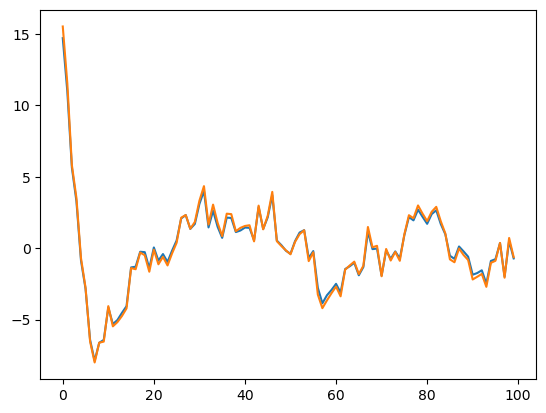

In [42]:
t = 100
reconstructed = model.inverse_transform(sample_spec, phases)
print(reconstructed.shape)
plt.plot(reconstructed[0,0][:t])
plt.plot(waveform[0,0][:t])

In [43]:
print(reconstructed.shape)

torch.Size([1, 1, 4992])


In [44]:
reconstructed[0][:10].shape

torch.Size([1, 4992])

In [45]:
reconstructed

tensor([[[14.6983, 10.9700,  5.6435,  ...,  0.0764,  0.7330, -1.7018]]])

In [13]:
sample_data[500]["emg"]

tensor([[ 3.7376,  3.7151,  1.4155,  ..., -2.8163, -2.8326, -1.5519]])

In [ ]:
import transformers.trainer as trainer


class CustomTrainer(trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_idx = 0
        self.epoch_idx = 0

    #custom compute loss function

    def compute_loss(self, model, inputs, return_outputs=False):


        emg = inputs["emg"]

        output = model.forward(emg)


        loss = output.loss

        #log the loss, 



